# Laboratorio 4 - Regresión Logistica
### Autor: Javier Mombiela
### Fecha: 27-03-2023

In [111]:
#importacion de paquetes
import numpy as np
import matplotlib.pyplot as plt

## Task 1.1

In [112]:
#leyendo el archivo CSV proporcionado y almacenandolo en un np.array 
data = np.genfromtxt('framingham.csv', delimiter=',', skip_header=1)

# Limpiar la data con NA 
mean = np.nanmean(data, axis=0)	# Calcular la media por cada columna
nan_indices = np.where(np.isnan(data))
data[nan_indices] = np.take(mean, nan_indices[1])	# Reemplazar valores con la media

## Task 1.2

In [113]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en variables independientes (X) y variable dependiente (y)
X = data[:, [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13]]
y = data[:, 15]

# Imprimir la forma de los arreglos X e y
print('Forma de X:', X.shape)
print('Forma de y:', y.shape)

# Generar características polinómicas
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)


# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo logístico
model = LogisticRegression()
model.fit(X_train, y_train)

Forma de X: (4238, 11)
Forma de y: (4238,)


c:\Users\rjmom\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Task 1.3

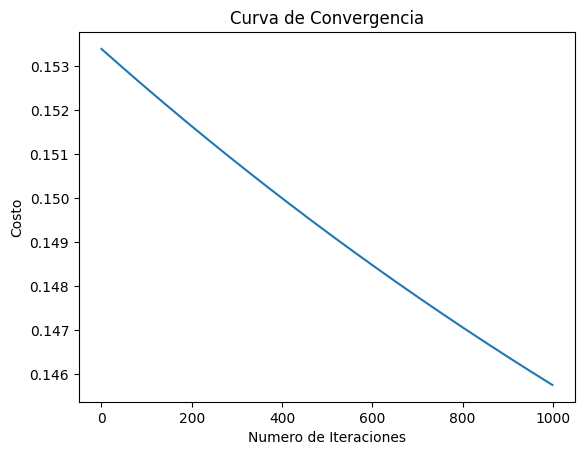

In [114]:
# Definir una función sigmoid que calcule la función sigmoidal para un conjunto de valores z.
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# definiendo funciones de costo y gradiante
cost = lambda X,y,t: ((X @ t - y) ** 2).sum() / len(y)
grad = lambda X,y,t : 2 * X.T @ (X @ t - y) / len(y)

# Definir funcion de regresion logistica
def logistic_regression(X, y, alpha, num_iters, cost_func, grad_func):
    m, n = X.shape
    theta = np.zeros(n)

    costs = []
    for i in range(num_iters):
        h = sigmoid(X @ theta)
        J = cost_func(X, y, theta)
        grad = grad_func(X, y, theta)
        theta -= alpha * grad
        costs.append(J)
    
    return theta, costs


#llamar a la funcion logistic_regression y almacenar los parametros theta ajustados y los costos en theta_logistic y costs_logistic respectivamente
theta, costs = logistic_regression(X_train, y_train, alpha=0.000000001, num_iters=1000, cost_func=cost, grad_func=grad)

# plt.plot(X, y, 'ro')
# plt.show()

plt.plot(costs)
plt.title("Curva de Convergencia")
plt.xlabel('Numero de Iteraciones')
plt.ylabel('Costo')
plt.show()

## Task 1.4

c:\Users\rjmom\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\rjmom\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

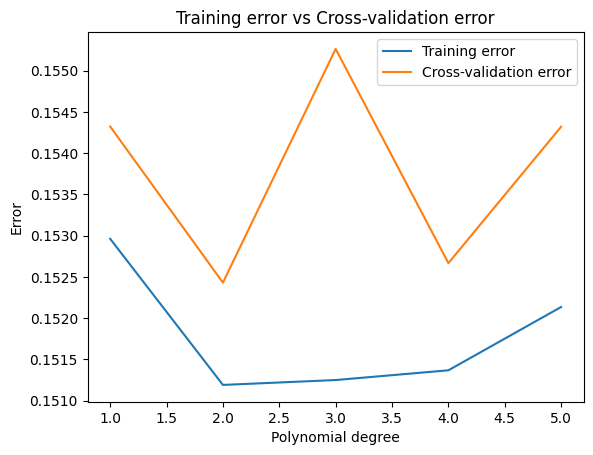

El grado óptimo es: 2
La precisión del modelo final es 0.8532326569136385


c:\Users\rjmom\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [115]:
from sklearn.model_selection import cross_val_score, KFold

# Generar características polinómicas
train_errors, val_errors = [], []
degrees = range(1, 6)

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Ajustar el modelo logístico usando cross-validation
    model = LogisticRegression(max_iter=100)
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    train_error, val_error = [], []
    for train_index, val_index in kf.split(X_poly, y):
        X_train, X_val = X_poly[train_index], X_poly[val_index]
        y_train, y_val = y[train_index], y[val_index]
        model.fit(X_train, y_train)
        train_error.append(1 - model.score(X_train, y_train))
        val_error.append(1 - model.score(X_val, y_val))
    train_errors.append(np.mean(train_error))
    val_errors.append(np.mean(val_error))

# Graficar training error vs cross-validation error
plt.plot(degrees, train_errors, label='Training error')
plt.plot(degrees, val_errors, label='Cross-validation error')
plt.title('Training error vs Cross-validation error')
plt.xlabel('Polynomial degree')
plt.ylabel('Error')
plt.legend()
plt.show()

# Encontrar el grado óptimo
min_val_error = min(val_errors)
min_val_error_degree = degrees[val_errors.index(min_val_error)]
print(f"El grado óptimo es: {min_val_error_degree}")

# Ajustar el modelo final usando el grado óptimo
poly = PolynomialFeatures(degree=min_val_error_degree)
X_poly = poly.fit_transform(X)
model = LogisticRegression(max_iter=1000)
model.fit(X_poly, y)
accuracy = model.score(X_poly, y)
print(f"La precisión del modelo final es {accuracy}")